In [1]:
import pandas as pd
import subprocess
import os
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

In [2]:
directory = "/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth"
chromosomes = list(map(str, range(1, 20))) + ['X', 'Y']
pileup_data = {}

for chr in chromosomes:
    file_path = os.path.join(directory, f"CLIP-chr{chr}_depth.pileup")
    try:
        df = pd.read_csv(file_path, sep='\t', names=['chrom', 'pos', 'ref', 'count', 'basereads', 'quals'])
        pileup_data[f"chr{chr}"] = df
    except FileNotFoundError:
        print(f"File not found: {file_path}")


In [3]:
tokeep = re.compile('[^AGCTagct]')
for chr_key in pileup_data.keys():
    pileup_data[chr_key]['matches'] = pileup_data[chr_key]['basereads'].apply(lambda x: tokeep.sub('', x))

In [4]:
pileup_new = {}

for chr_key in pileup_data.keys():
    pileup_new[chr_key] = pileup_data[chr_key][['chrom', 'pos', 'matches']]
    pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()

/tmp/ipykernel_155697/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()
/tmp/ipykernel_155697/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()
/tmp/ipykernel_155697/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [5]:
for chr_key in pileup_data.keys():
    pileup_new[chr_key] = pileup_new[chr_key][pileup_new[chr_key]['matches'].str.len() >= 200]

In [6]:
def calculate_shannon_entropy(base_counts):
    total = sum(base_counts.values())
    entropy = 0
    for count in base_counts.values():
        if count > 0:
            p = count / total
            entropy -= p * np.log2(p)
    return entropy



for chr_key in pileup_data.keys():
    entropies = []
    for index, row in pileup_new[chr_key].iterrows():
        base_counts = Counter(row['matches'])
        entropy = calculate_shannon_entropy(base_counts)
        entropies.append(entropy)
    pileup_new[chr_key]['shannon_entropy'] = entropies

In [7]:
shannon_entropy_values = []
for chr_key in pileup_data.keys():
    shannon_entropy_values += pileup_new[chr_key]['shannon_entropy'].tolist()

(array([2.69891e+05, 2.71470e+04, 1.87180e+04, 1.29540e+04, 8.96600e+03,
        6.37800e+03, 4.78300e+03, 3.67100e+03, 3.04100e+03, 2.57200e+03,
        2.15700e+03, 1.85500e+03, 1.59700e+03, 1.18800e+03, 9.48000e+02,
        7.52000e+02, 6.85000e+02, 6.23000e+02, 6.09000e+02, 5.04000e+02,
        5.04000e+02, 4.64000e+02, 3.98000e+02, 4.02000e+02, 3.85000e+02,
        4.00000e+02, 3.57000e+02, 4.12000e+02, 3.47000e+02, 3.31000e+02,
        2.98000e+02, 2.49000e+02, 1.65000e+02, 1.15000e+02, 6.70000e+01,
        4.00000e+01, 1.60000e+01, 1.00000e+01, 2.00000e+00, 4.00000e+00]),
 array([0.        , 0.04911957, 0.09823914, 0.14735871, 0.19647828,
        0.24559785, 0.29471742, 0.34383699, 0.39295656, 0.44207613,
        0.4911957 , 0.54031527, 0.58943484, 0.63855441, 0.68767398,
        0.73679355, 0.78591312, 0.83503269, 0.88415226, 0.93327183,
        0.9823914 , 1.03151097, 1.08063054, 1.12975011, 1.17886968,
        1.22798925, 1.27710882, 1.32622839, 1.37534796, 1.42446753,
      

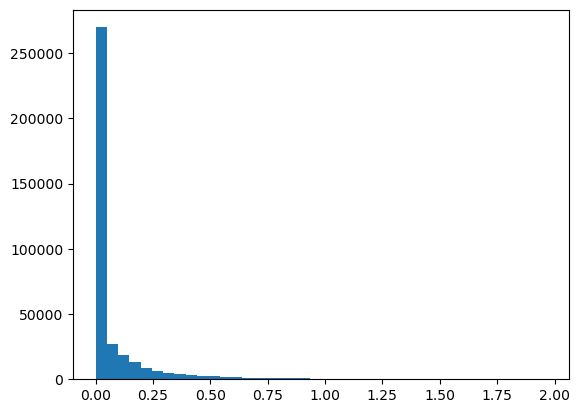

In [8]:
plt.hist(shannon_entropy_values, bins=40)
#plt.xlim(0.2,2)
#plt.ylim(0, 100000)

0.08164332030119476
0.0


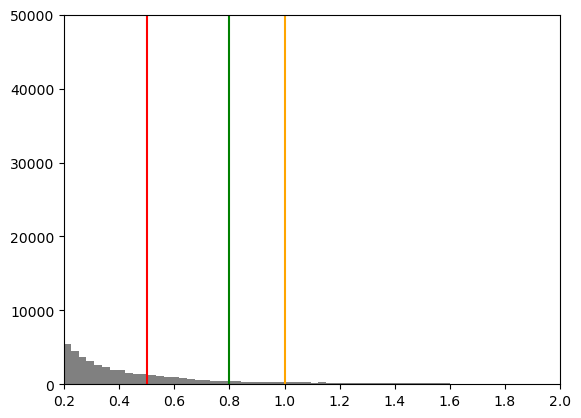

In [9]:
plt.hist(shannon_entropy_values, bins=70, color = 'grey')
plt.xlim(0.2,2)
plt.ylim(0, 50000)
plt.axvline(0.5, c='red')
plt.axvline(0.8, c='green')
plt.axvline(1, c='orange')
print(np.mean(shannon_entropy_values))
print(np.median(shannon_entropy_values))

In [10]:
count_greater_than_05 = sum(1 for x in shannon_entropy_values if x > 0.5)
count_greater_than_08 = sum(1 for x in shannon_entropy_values if x > 0.8)
count_greater_than_1 = sum(1 for x in shannon_entropy_values if x > 1)
count_all = len(shannon_entropy_values)
print(count_greater_than_05)
print(count_greater_than_08)
print(count_greater_than_1)
print(count_all)
print(count_greater_than_05 / count_all)
print(count_greater_than_08 / count_all)
print(count_greater_than_1 / count_all)

15497
7141
4771
374005
0.04143527492947955
0.019093327629309768
0.012756513950348257


In [11]:
pileup_shn_16 = {}

for chr_key in pileup_data.keys():
    pileup_shn_16[chr_key] = pileup_new[chr_key][pileup_new[chr_key]['shannon_entropy'] > 1.6]

In [12]:
pileup_shn = pd.concat([pileup_shn_16[f'chr{i}'] for i in range(1, 20)] + [pileup_shn_16['chrX'], pileup_shn_16['chrY']])
pileup_shn

,chrom,pos,matches,shannon_entropy
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160
584022,chr1,10270070,CCCCCCCCCTGCCCCCCCTGTCCACGGTTCTCTCCCCTTCCTGGCC...,1.744113
1711948,chr1,30843092,CCCCCCCCCCCCCCCCCCCCCCCCCCCTTCCTTCTTTTCCTCCCCC...,1.678034
2179853,chr1,34223184,CCCCCCCCCCAAAAAAAAAAAGCCGGCCGCAGCCCGGAGCACCCCG...,1.665947
2188629,chr1,34231986,GGGGGGGGTCAATAACGCACGGCCGTAAGGTCCCGAGTTGCCGGGG...,1.638069
...,...,...,...,...
4727681,chrX,95199070,GGGGGGGGGGGGGGAAAAAAAGGGGGGGAAACTAGCGGTAACCAAC...,1.648688
5328407,chrX,103324676,TTTTTTTTAAAAAAAAAAACTCCCTCTCCTTTCTTCTCCTCTCCTC...,1.628745
5565712,chrX,105063213,GGGGGGGGGGGGGGGGAAAAAAAGAGAAGAGACGGGCGGCAGCGAA...,1.622019
6551176,chrX,133486932,CCCCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGAAGTTAAGAGGGA...,1.600068


In [13]:
pileup_shn['start'] = pileup_shn['pos'] - 6
pileup_shn['end'] = pileup_shn['pos'] + 5
pileup_shn

,chrom,pos,matches,shannon_entropy,start,end
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160,4841528,4841539
584022,chr1,10270070,CCCCCCCCCTGCCCCCCCTGTCCACGGTTCTCTCCCCTTCCTGGCC...,1.744113,10270064,10270075
1711948,chr1,30843092,CCCCCCCCCCCCCCCCCCCCCCCCCCCTTCCTTCTTTTCCTCCCCC...,1.678034,30843086,30843097
2179853,chr1,34223184,CCCCCCCCCCAAAAAAAAAAAGCCGGCCGCAGCCCGGAGCACCCCG...,1.665947,34223178,34223189
2188629,chr1,34231986,GGGGGGGGTCAATAACGCACGGCCGTAAGGTCCCGAGTTGCCGGGG...,1.638069,34231980,34231991
...,...,...,...,...,...,...
4727681,chrX,95199070,GGGGGGGGGGGGGGAAAAAAAGGGGGGGAAACTAGCGGTAACCAAC...,1.648688,95199064,95199075
5328407,chrX,103324676,TTTTTTTTAAAAAAAAAAACTCCCTCTCCTTTCTTCTCCTCTCCTC...,1.628745,103324670,103324681
5565712,chrX,105063213,GGGGGGGGGGGGGGGGAAAAAAAGAGAAGAGACGGGCGGCAGCGAA...,1.622019,105063207,105063218
6551176,chrX,133486932,CCCCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGAAGTTAAGAGGGA...,1.600068,133486926,133486937


In [14]:
pileup_shn_depth = pileup_shn[pileup_shn['matches'].str.len() > 200]
pileup_shn_depth

,chrom,pos,matches,shannon_entropy,start,end
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160,4841528,4841539
584022,chr1,10270070,CCCCCCCCCTGCCCCCCCTGTCCACGGTTCTCTCCCCTTCCTGGCC...,1.744113,10270064,10270075
1711948,chr1,30843092,CCCCCCCCCCCCCCCCCCCCCCCCCCCTTCCTTCTTTTCCTCCCCC...,1.678034,30843086,30843097
2179853,chr1,34223184,CCCCCCCCCCAAAAAAAAAAAGCCGGCCGCAGCCCGGAGCACCCCG...,1.665947,34223178,34223189
2188629,chr1,34231986,GGGGGGGGTCAATAACGCACGGCCGTAAGGTCCCGAGTTGCCGGGG...,1.638069,34231980,34231991
...,...,...,...,...,...,...
4727681,chrX,95199070,GGGGGGGGGGGGGGAAAAAAAGGGGGGGAAACTAGCGGTAACCAAC...,1.648688,95199064,95199075
5328407,chrX,103324676,TTTTTTTTAAAAAAAAAAACTCCCTCTCCTTTCTTCTCCTCTCCTC...,1.628745,103324670,103324681
5565712,chrX,105063213,GGGGGGGGGGGGGGGGAAAAAAAGAGAAGAGACGGGCGGCAGCGAA...,1.622019,105063207,105063218
6551176,chrX,133486932,CCCCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGAAGTTAAGAGGGA...,1.600068,133486926,133486937


In [18]:
bedform = pileup_shn_depth[['chrom', 'start', 'end']]
bedform.to_csv('CLIP_mut_harsh_harsh.bed', sep='\t', index=False, header=False)

In [19]:
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_harsh_harsh.bed -fo CLIP_mut_harsh_harsh.fasta

In [20]:
refneg = pd.read_csv("/rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/gencode_negstrand.gtf.bed", sep="\t", header=None)
refneg.columns = ["chrom", "start", "end"]
refneg = refneg[refneg["chrom"] != "chrM"]
refneg

,chrom,start,end
0,chr1,3276124,3741721
1,chr1,3435954,3438772
2,chr1,3445779,3448011
3,chr1,3535200,3537508
4,chr1,3582674,3584730
...,...,...,...
27575,chrY,90510316,90542914
27576,chrY,90614770,90617133
27577,chrY,90676615,90678894
27578,chrY,90763696,90766736


In [21]:
pileup_shn_depth['negativity'] = False
for index, row in pileup_shn_depth.iterrows():
    chromosome = row['chrom']
    position = row['pos']

    for _, ref_row in refneg[refneg['chrom'] == chromosome].iterrows():
        if ref_row['start'] <= position <= ref_row['end']:
            pileup_shn_depth.at[index, 'negativity'] = True
            break


/tmp/ipykernel_155697/2741900521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['negativity'] = False


In [22]:
pileup_shn_depth['start'] = pileup_shn_depth['pos'] - 6
pileup_shn_depth['end'] = pileup_shn_depth['pos'] + 5
pileup_shn_depth

/tmp/ipykernel_155697/181903189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['start'] = pileup_shn_depth['pos'] - 6
/tmp/ipykernel_155697/181903189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['end'] = pileup_shn_depth['pos'] + 5


,chrom,pos,matches,shannon_entropy,start,end,negativity
8095,chr1,4841534,AGAAGAAAAGGAAGAAAAAAAGAAAAGGATTTTTAAAAAAAAAAAA...,1.685160,4841528,4841539,False
584022,chr1,10270070,CCCCCCCCCTGCCCCCCCTGTCCACGGTTCTCTCCCCTTCCTGGCC...,1.744113,10270064,10270075,True
1711948,chr1,30843092,CCCCCCCCCCCCCCCCCCCCCCCCCCCTTCCTTCTTTTCCTCCCCC...,1.678034,30843086,30843097,True
2179853,chr1,34223184,CCCCCCCCCCAAAAAAAAAAAGCCGGCCGCAGCCCGGAGCACCCCG...,1.665947,34223178,34223189,False
2188629,chr1,34231986,GGGGGGGGTCAATAACGCACGGCCGTAAGGTCCCGAGTTGCCGGGG...,1.638069,34231980,34231991,False
...,...,...,...,...,...,...,...
4727681,chrX,95199070,GGGGGGGGGGGGGGAAAAAAAGGGGGGGAAACTAGCGGTAACCAAC...,1.648688,95199064,95199075,False
5328407,chrX,103324676,TTTTTTTTAAAAAAAAAAACTCCCTCTCCTTTCTTCTCCTCTCCTC...,1.628745,103324670,103324681,True
5565712,chrX,105063213,GGGGGGGGGGGGGGGGAAAAAAAGAGAAGAGACGGGCGGCAGCGAA...,1.622019,105063207,105063218,False
6551176,chrX,133486932,CCCCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGAAGTTAAGAGGGA...,1.600068,133486926,133486937,False


In [23]:
shn_pos = pileup_shn_depth[pileup_shn_depth['negativity'] == False]
shn_neg = pileup_shn_depth[pileup_shn_depth['negativity'] == True]

In [24]:
bedform_pos = shn_pos[['chrom', 'start', 'end']]
bedform_neg = shn_neg[['chrom', 'start', 'end']]
bedform_pos.to_csv('CLIP_mut_pos_harsh_harsh.bed', sep='\t', index=False, header=False)
bedform_neg.to_csv('CLIP_mut_neg_harsh_harsh.bed', sep='\t', index=False, header=False)

In [25]:
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_pos_harsh_harsh.bed -fo CLIP_mut_pos_harsh_harsh.fasta
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_neg_harsh_harsh.bed -fo CLIP_mut_neg_harsh_harsh.fasta

In [27]:
def reverse_complement(sequence):
    complement = str.maketrans('ATCG', 'TAGC')
    return sequence.translate(complement)[::-1]

def process_fasta(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        header = None
        sequence = []
        
        for line in infile:
            line = line.strip()
            if line.startswith('>'):
                if header is not None:
                    rev_comp_sequence = reverse_complement(''.join(sequence))
                    outfile.write(f"{header}\n{rev_comp_sequence}\n")
                
                header = line
                sequence = []
            else:
                sequence.append(line)
        
        if header is not None:
            rev_comp_sequence = reverse_complement(''.join(sequence))
            outfile.write(f"{header}\n{rev_comp_sequence}\n")


input_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_harsh_harsh.fasta'
output_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev_harsh_harsh.fasta'
process_fasta(input_file, output_file)

In [28]:
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_harsh_harsh.fasta | wc -l
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev_harsh_harsh.fasta | wc -l
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_pos_harsh_harsh.fasta | wc -l

280
280
342


In [29]:
!cat /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_pos_harsh_harsh.fasta /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev_harsh_harsh.fasta > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_harsh_harsh.fasta

In [30]:
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_harsh_harsh.fasta | wc -l

622


In [31]:
!awk 'NR % 2 == 0' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_harsh_harsh.fasta > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh_harsh.fasta

In [32]:
def convert_sequences_t_to_u(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            modified_line = line.replace('T', 'U')
            outfile.write(modified_line)


input_sequences = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh_harsh.fasta'
output_sequences = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh_harsh_TU.fasta'
convert_sequences_t_to_u(input_sequences, output_sequences)

In [33]:
def find_top_hexamers_with_ratios(sequences):
    hexamer_counts = Counter()
    
    for seq in sequences:
        if len(seq) == 11:
            for i in range(len(seq) - 5):
                hexamer = seq[i:i+6]
                hexamer_counts[hexamer] += 1

    total_counts = sum(hexamer_counts.values())
    hexamer_ratios = {hexamer: count / total_counts for hexamer, count in hexamer_counts.items()}
    most_common_hexamers = Counter(hexamer_ratios).most_common(10)
    return most_common_hexamers

In [34]:
def fasta_to_list(fasta_file):
    with open(fasta_file, 'r') as file:
        sequences = [line.strip() for line in file if line.strip()]
    return sequences

# Usage example:
fasta_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_harsh_harsh_TU.fasta'
sequences_list = fasta_to_list(fasta_file)
sequences_list[0:5]

['AUGACGGUGCA', 'UGGGAGAUGGG', 'GCAAAGAGGCC', 'UCACUGAGGUG', 'GGUAAGAGCAC']

In [35]:
top_hexamers = find_top_hexamers_with_ratios(sequences_list)
for hexamer, ratio in top_hexamers:
    print(f"Hexamer: {hexamer}, Ratio: {ratio:.4f}")


Hexamer: AAGGAG, Ratio: 0.0102
Hexamer: AGAGAG, Ratio: 0.0070
Hexamer: GAAGAG, Ratio: 0.0064
Hexamer: GAGAGA, Ratio: 0.0064
Hexamer: UUUGUG, Ratio: 0.0064
Hexamer: AGGAGA, Ratio: 0.0059
Hexamer: AAGAGC, Ratio: 0.0054
Hexamer: GAGAGG, Ratio: 0.0054
Hexamer: GAGAUG, Ratio: 0.0048
Hexamer: AGAUGG, Ratio: 0.0048


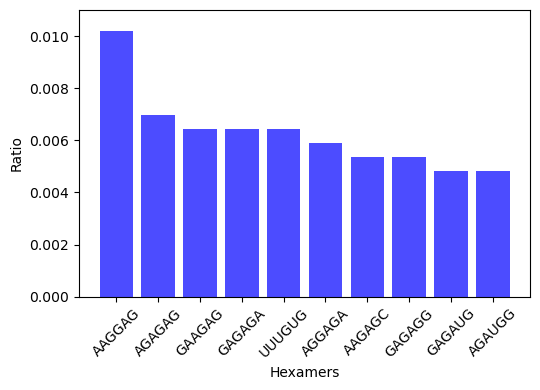

In [44]:
hexamers = [hexamer for hexamer, ratio in top_hexamers]
ratios = [ratio for hexamer, ratio in top_hexamers]

plt.figure(figsize=(5.5, 4))
plt.bar(hexamers, ratios, color='blue', alpha = 0.7)
plt.xlabel('Hexamers')
plt.ylabel('Ratio')
plt.ylim(0, 0.011)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()